# Analisi parametri biomeccanici mezzofondisti
Il file che analizzeremo contiene dati relativi ad un allenamento di corsa, con vari parametri biomeccanici raccolti tramite sensore. 
Ecco alcuni dei parametri inclusi nel dataset:

- Timestamp: Rappresenta il momento in cui è stato registrato il dato.
- Power (w/kg): Potenza espressa in watt per chilogrammo.
- Form Power (w/kg): Potenza della forma espressa in watt per chilogrammo.
- Air Power (w/kg): Potenza dell'aria, anch'essa espressa in watt per chilogrammo.
- Watch Speed (m/s) e Stryd Speed (m/s): Velocità misurata dallo smartwatch e dal sensore Stryd, espressa in metri al secondo.
- Watch Distance (meters) e Stryd Distance (meters): Distanza misurata dallo smartwatch e dal sensore Stryd, espressa in metri.
- Stiffness, Stiffness/kg: Rigidità totale e rigidità per chilogrammo.
- Ground Time (ms): Tempo di contatto con il suolo, espresso in millisecondi.
- Cadence (spm): Cadenza dei passi, espressa in passi al minuto.
- Vertical Oscillation (cm): Oscillazione verticale, espressa in centimetri.
- Watch Elevation (m) e Stryd Elevation (m): Elevazione misurata dallo smartwatch e dal sensore Stryd, espressa in metri.

Con questi dati, possiamo eseguire diverse analisi, come:

- Analisi descrittiva: Calcolare statistiche di base (media, mediana, deviazione standard, ecc.) per ciascuna variabile.
- Analisi temporale: Esaminare come cambiano nel tempo potenza, velocità, cadenza, e altre metriche durante l'allenamento.
- Correlazione tra variabili: Determinare come diverse metriche (es. potenza e velocità) sono correlate tra loro.
- Analisi della performance: Identificare momenti in cui la performance dell'atleta migliora o peggiora (es. aumenti di velocità o di potenza).
- Visualizzazione: Creare grafici per rappresentare visivamente l'andamento delle metriche nel tempo o le correlazioni tra variabili.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = 'File allenamento 19 Km par biomeccanici.xlsx'
data = pd.read_excel(file_path)

# Visualizzazione delle prime righe per comprendere la struttura dei dati
data.head()


,Timestamp,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Watch Distance (meters),Stryd Distance (meters),Stiffness,Stiffness/kg,Ground Time (ms),Cadence (spm),Vertical Oscillation (cm),Watch Elevation (m),Stryd Elevation (m)
0,1707035707,2.582278,0.000000,0.0,2.584,0.00000,2.8,0.0,0.00000,0.000000,0,180,0.00000,249.39999,104.85
1,1707035708,2.607595,0.848101,0.0,2.628,2.58984,6.8,232.0,12.44565,0.157540,276,180,5.46421,249.39999,104.85
2,1707035709,2.607595,0.848101,0.0,2.624,2.59766,7.8,233.5,12.31600,0.155899,277,180,5.46308,249.39999,104.84
3,1707035710,2.632911,0.848101,0.0,2.643,2.60547,10.4,235.0,12.18634,0.154257,278,182,5.46194,249.39999,104.83
4,1707035711,2.683544,0.854430,0.0,2.675,2.60938,13.9,237.5,12.24566,0.155008,277,182,5.49180,249.39999,104.83


### convertiamo il timestamp in un formato "leggibile" 

In [7]:
from datetime import datetime

# Conversione del Timestamp da formato UNIX a formato leggibile (dd-mm-yyyy HH:MM:SS)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Formattazione del Timestamp nel formato desiderato
data['Timestamp'] = data['Timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Visualizzazione delle prime righe per confermare la modifica
data.head()


,Timestamp,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Watch Distance (meters),Stryd Distance (meters),Stiffness,Stiffness/kg,Ground Time (ms),Cadence (spm),Vertical Oscillation (cm),Watch Elevation (m),Stryd Elevation (m)
0,04-02-2024 08:35:07,2.582278,0.000000,0.0,2.584,0.00000,2.8,0.0,0.00000,0.000000,0,180,0.00000,249.39999,104.85
1,04-02-2024 08:35:08,2.607595,0.848101,0.0,2.628,2.58984,6.8,232.0,12.44565,0.157540,276,180,5.46421,249.39999,104.85
2,04-02-2024 08:35:09,2.607595,0.848101,0.0,2.624,2.59766,7.8,233.5,12.31600,0.155899,277,180,5.46308,249.39999,104.84
3,04-02-2024 08:35:10,2.632911,0.848101,0.0,2.643,2.60547,10.4,235.0,12.18634,0.154257,278,182,5.46194,249.39999,104.83
4,04-02-2024 08:35:11,2.683544,0.854430,0.0,2.675,2.60938,13.9,237.5,12.24566,0.155008,277,182,5.49180,249.39999,104.83


# analisi descrittiva

In [8]:
# Calcolo delle statistiche descrittive per il dataset
desc_stats = data.describe()

# Per migliorare la leggibilità, arrotondiamo i valori a due cifre decimali
desc_stats = desc_stats.round(2)

desc_stats


,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Watch Distance (meters),Stryd Distance (meters),Stiffness,Stiffness/kg,Ground Time (ms),Cadence (spm),Vertical Oscillation (cm),Watch Elevation (m),Stryd Elevation (m)
count,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00,6249.00
mean,2.96,0.88,0.03,2.84,2.78,9126.68,9171.82,11.66,0.15,274.65,177.29,5.84,224.75,81.07
std,0.24,0.04,0.03,0.23,0.22,5137.20,5036.72,0.75,0.01,36.73,4.27,0.41,15.87,15.76
min,2.03,0.00,0.00,1.36,0.00,2.80,0.00,0.00,0.00,0.00,120.00,0.00,202.40,58.92
25%,2.84,0.87,0.00,2.71,2.66,4739.60,4868.00,11.47,0.15,262.00,176.00,5.73,211.60,67.89
50%,2.94,0.89,0.01,2.84,2.78,9163.90,9224.00,11.68,0.15,274.00,178.00,5.88,222.60,78.43
75%,3.06,0.90,0.04,2.99,2.93,13621.50,13576.00,11.90,0.15,282.00,180.00,6.00,239.40,95.62
max,4.20,0.95,0.20,4.00,3.92,17806.80,17665.00,14.56,0.18,1010.00,214.00,11.96,252.60,108.70


L'analisi descrittiva del dataset rivela alcune statistiche interessanti per ciascuna variabile biomeccanica raccolta durante l'allenamento. Ecco un riassunto:

- Potenza (Power w/kg): La potenza media è di 2.96 w/kg con una deviazione standard di 0.24 w/kg, indicando una relativa uniformità nelle prestazioni con variazioni moderate.
- Potenza della Forma (Form Power w/kg): Media di 0.88 w/kg con una variazione molto limitata (deviazione standard di 0.04 w/kg), suggerendo una costanza nella forma di corsa.
- Potenza dell'Aria (Air Power w/kg): Media quasi trascurabile di 0.03 w/kg, con picchi fino a 0.20 w/kg, indicando che l'impatto dell'aria è generalmente basso ma può avere picchi in determinate condizioni.
- Velocità (Watch e Stryd Speed m/s): Le medie sono rispettivamente di 2.84 m/s e 2.78 m/s, con una leggera discrepanza che potrebbe riflettere differenze nella calibrazione o nella rilevazione tra smartwatch e sensore Stryd.
- Distanza (Watch e Stryd Distance meters): I dati mostrano che l'atleta ha percorso una distanza media di circa 9126.68 metri secondo lo smartwatch e 9171.82 metri secondo il sensore Stryd, confermando una buona coerenza tra i due dispositivi.
- Rigidità (Stiffness e Stiffness/kg): Valori medi di 11.66 e 0.15, rispettivamente, indicano la qualità della risposta elastica delle gambe all'impatto con il suolo.
- Tempo di Contatto con il Suolo (Ground Time ms): Media di 274.65 ms, con una variazione significativa che può riflettere cambiamenti nella fatica o nella tecnica di corsa.
- Cadenza (Cadence spm): Media di 177.29 passi al minuto, dimostrando una cadenza relativamente elevata e costante.
- Oscillazione Verticale (Vertical Oscillation cm): Media di 5.84 cm, con una leggera variazione che suggerisce una buona costanza nel movimento verticale durante la corsa.
- Elevazione (Watch e Stryd Elevation m): Le medie di elevazione registrate sono 224.75 m per lo smartwatch e 81.07 m per il sensore Stryd, mostrando una grande discrepanza che potrebbe dipendere da come ciascun dispositivo misura l'elevazione.

Queste statistiche forniscono un quadro complessivo delle prestazioni e delle caratteristiche della corsa dell'atleta.

# visualizzazione istogrammi, boxplot, pairplot e linee temporali

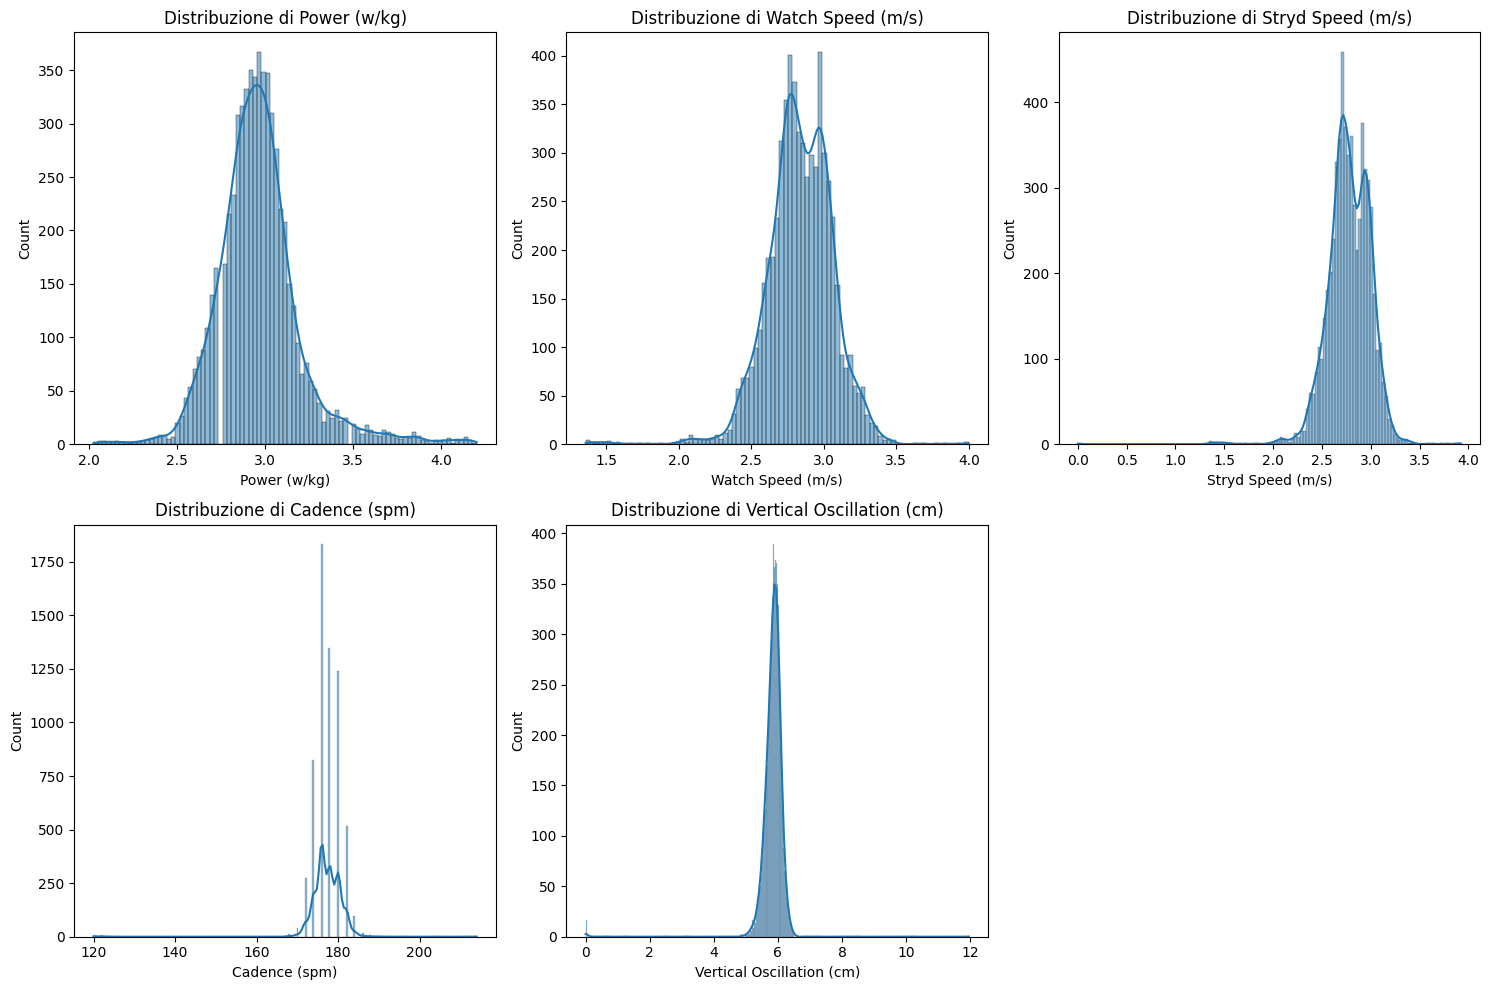

In [9]:
# Definizione di 5 variabili per le visualizzazioni
variabili_significative = ['Power (w/kg)', 'Watch Speed (m/s)', 
                           'Stryd Speed (m/s)', 'Cadence (spm)', 
                           'Vertical Oscillation (cm)']

# Preparazione del DataFrame contenente solo le variabili significative per il pairplot
df_significative = data[variabili_significative]

# Istogrammi con KDE per le variabili significative
plt.figure(figsize=(15, 10))

for i, var in enumerate(variabili_significative, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribuzione di {var}')

plt.tight_layout()
plt.show()

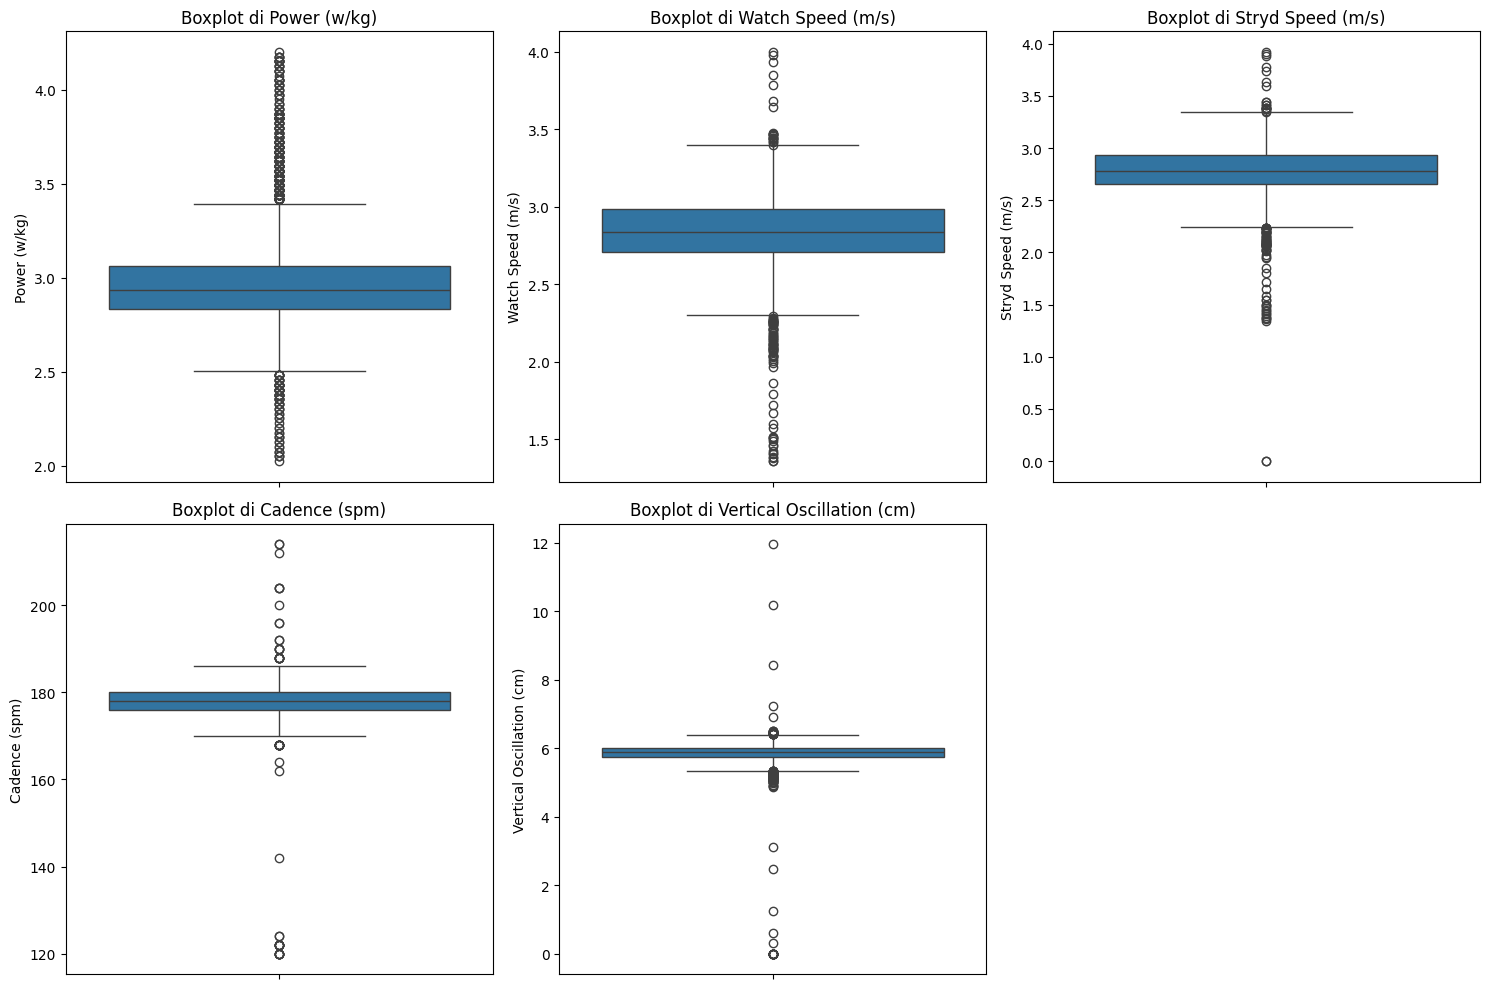

In [10]:
# Boxplot per le variabili significative
plt.figure(figsize=(15, 10))
for i, var in enumerate(variabili_significative, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot di {var}')

plt.tight_layout()
plt.show()


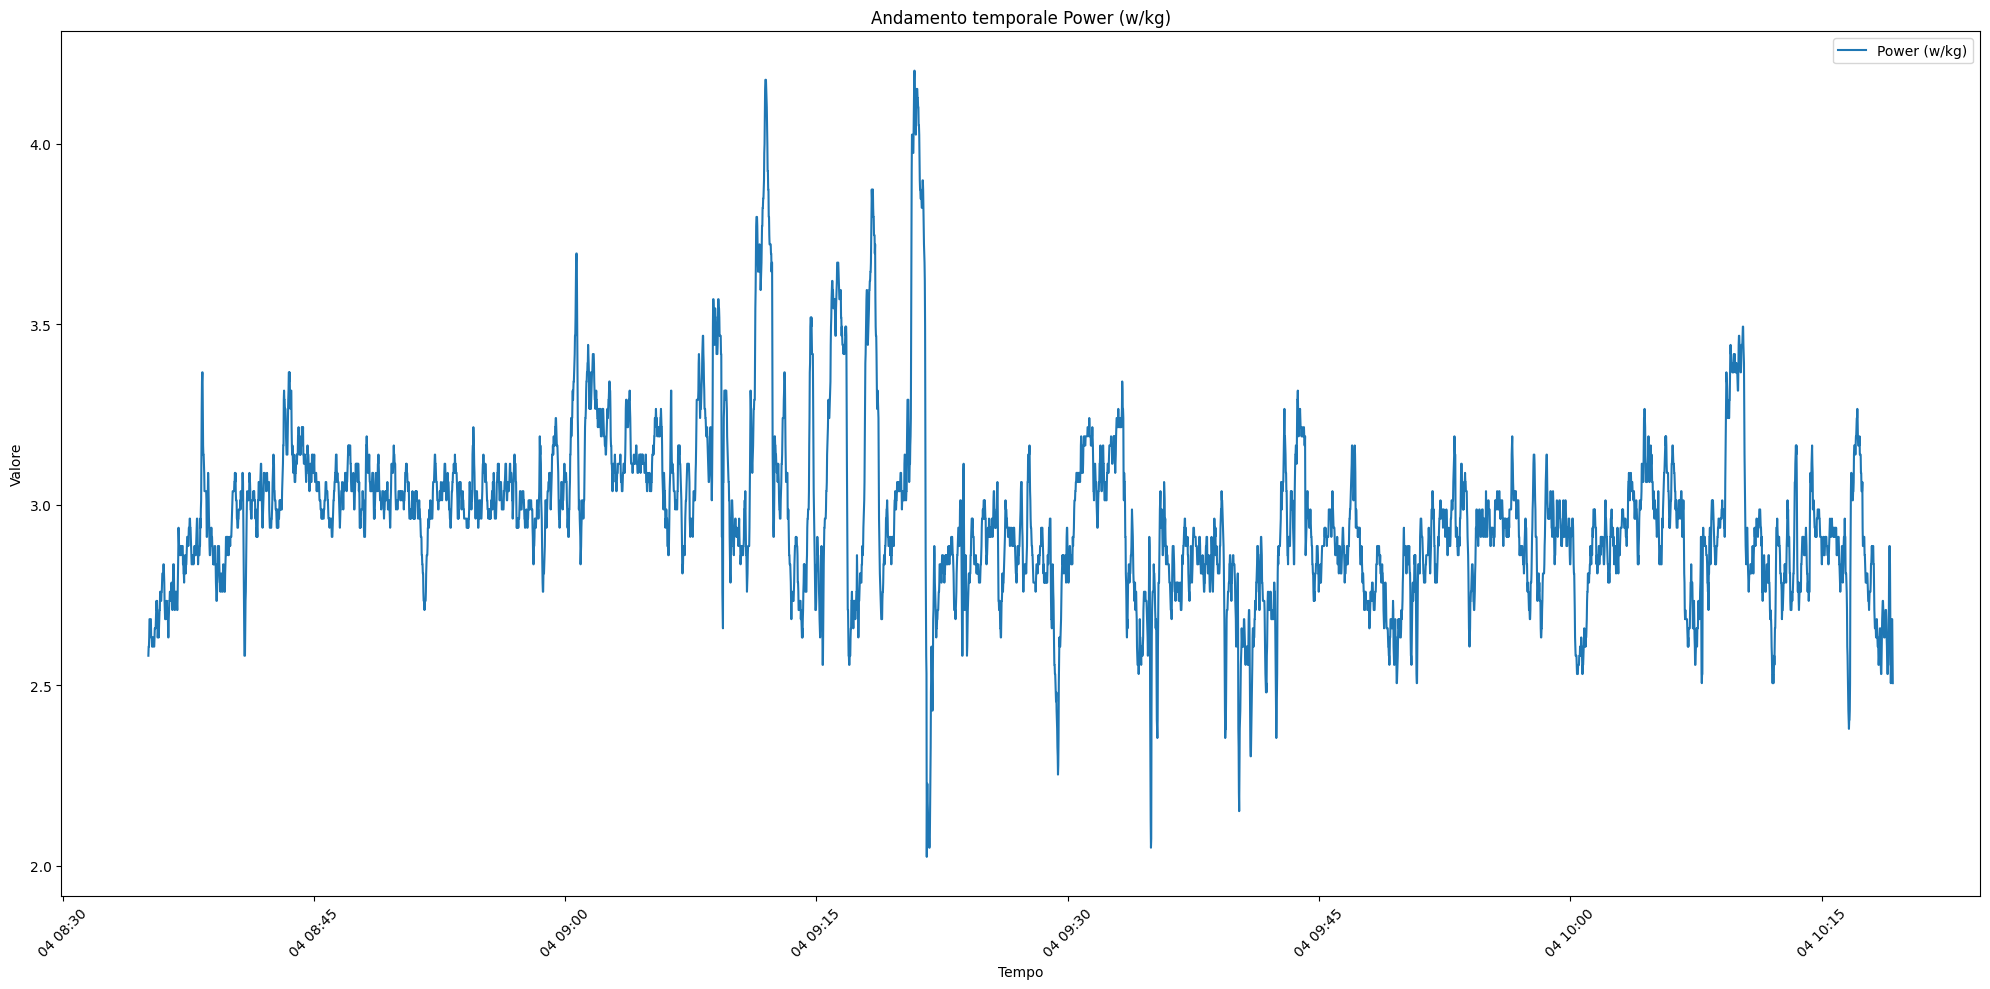

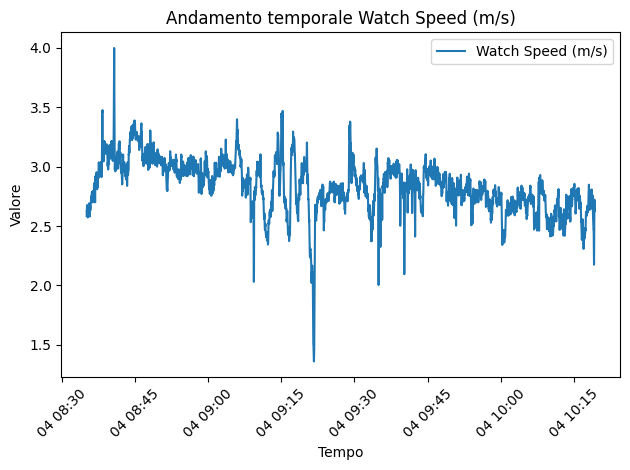

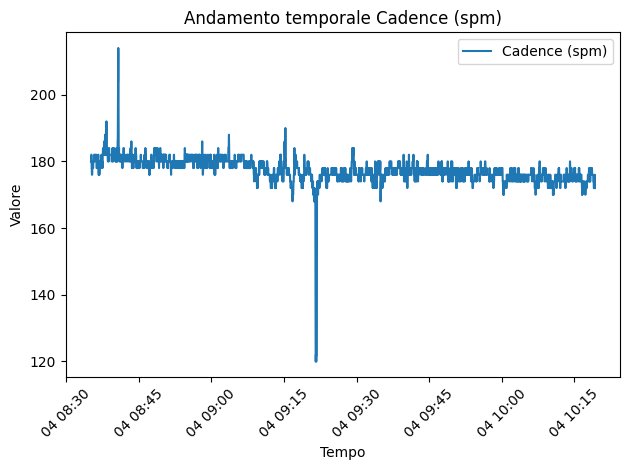

In [13]:
# Andamento temporale di alcune variabili
# Conversione del Timestamp in formato datetime per la visualizzazione
data['Timestamp_dt'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M:%S')

plt.figure(figsize=(20, 10))

# Selezioniamo alcune variabili per visualizzare l'andamento temporale
variabili_temporali = ['Power (w/kg)', 'Watch Speed (m/s)', 'Cadence (spm)']

for var in variabili_temporali:
    plt.plot(data['Timestamp_dt'], data[var], label=var)
    plt.xlabel('Tempo')
    plt.ylabel('Valore')
    plt.title(f'Andamento temporale {var}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

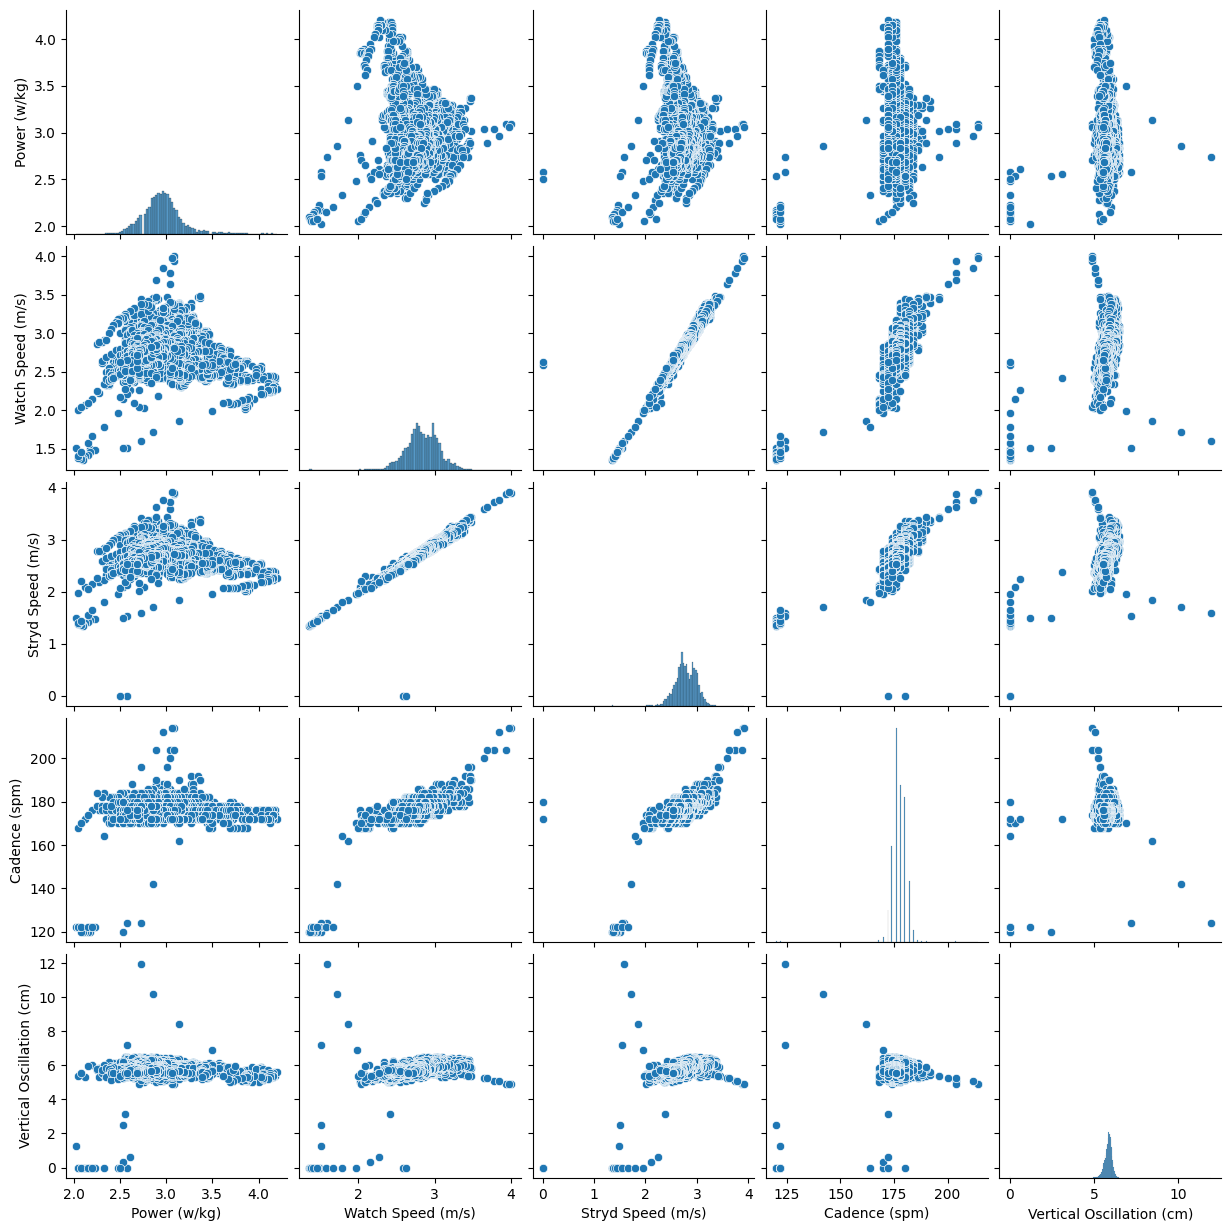

In [11]:
# Pairplot delle variabili significative
sns.pairplot(df_significative)
plt.show()

### Q&A
- come commentereste questo ultimo grafico?
- e se scegliessimo di 'clusterizzare' una variabile e usarla per andare a valutare le performance?

Potrebbe essere di utilizzare una metrica che varia in modo significativo durante la corsa e valutare come questa possa influenzare le prestazioni. Ad esempio, potremmo valutare:

- Cadence (spm): La cadenza può essere un indicatore dello stile di corsa e potrebbe essere interessante vedere come le altre metriche cambiano al variare della cadenza. Si potrebbe, per esempio, categorizzare la cadenza in "bassa", "media" e "alta" basandosi sui quartili della distribuzione dei suoi valori.

In [14]:
# Categorizzazione della variabile 'Cadence (spm)' in "bassa", "media", "alta" basandosi sui quartili della sua distribuzione
quartili_cadence = data['Cadence (spm)'].quantile([0.25, 0.5, 0.75]).tolist()

# Definizione della funzione per la categorizzazione
def categorizza_cadence(valore):
    if valore <= quartili_cadence[0]:
        return "bassa"
    elif valore <= quartili_cadence[1]:
        return "media"
    elif valore <= quartili_cadence[2]:
        return "alta"
    else:
        return "molto alta"

# Applicazione della funzione al dataset per creare una nuova colonna 'Cadence Category'
data['Cadence Category'] = data['Cadence (spm)'].apply(categorizza_cadence)

# Verifica delle prime righe per assicurarsi che la categorizzazione sia stata applicata correttamente
data[['Cadence (spm)', 'Cadence Category']].head()


,Cadence (spm),Cadence Category
0,180,alta
1,180,alta
2,180,alta
3,182,molto alta
4,182,molto alta


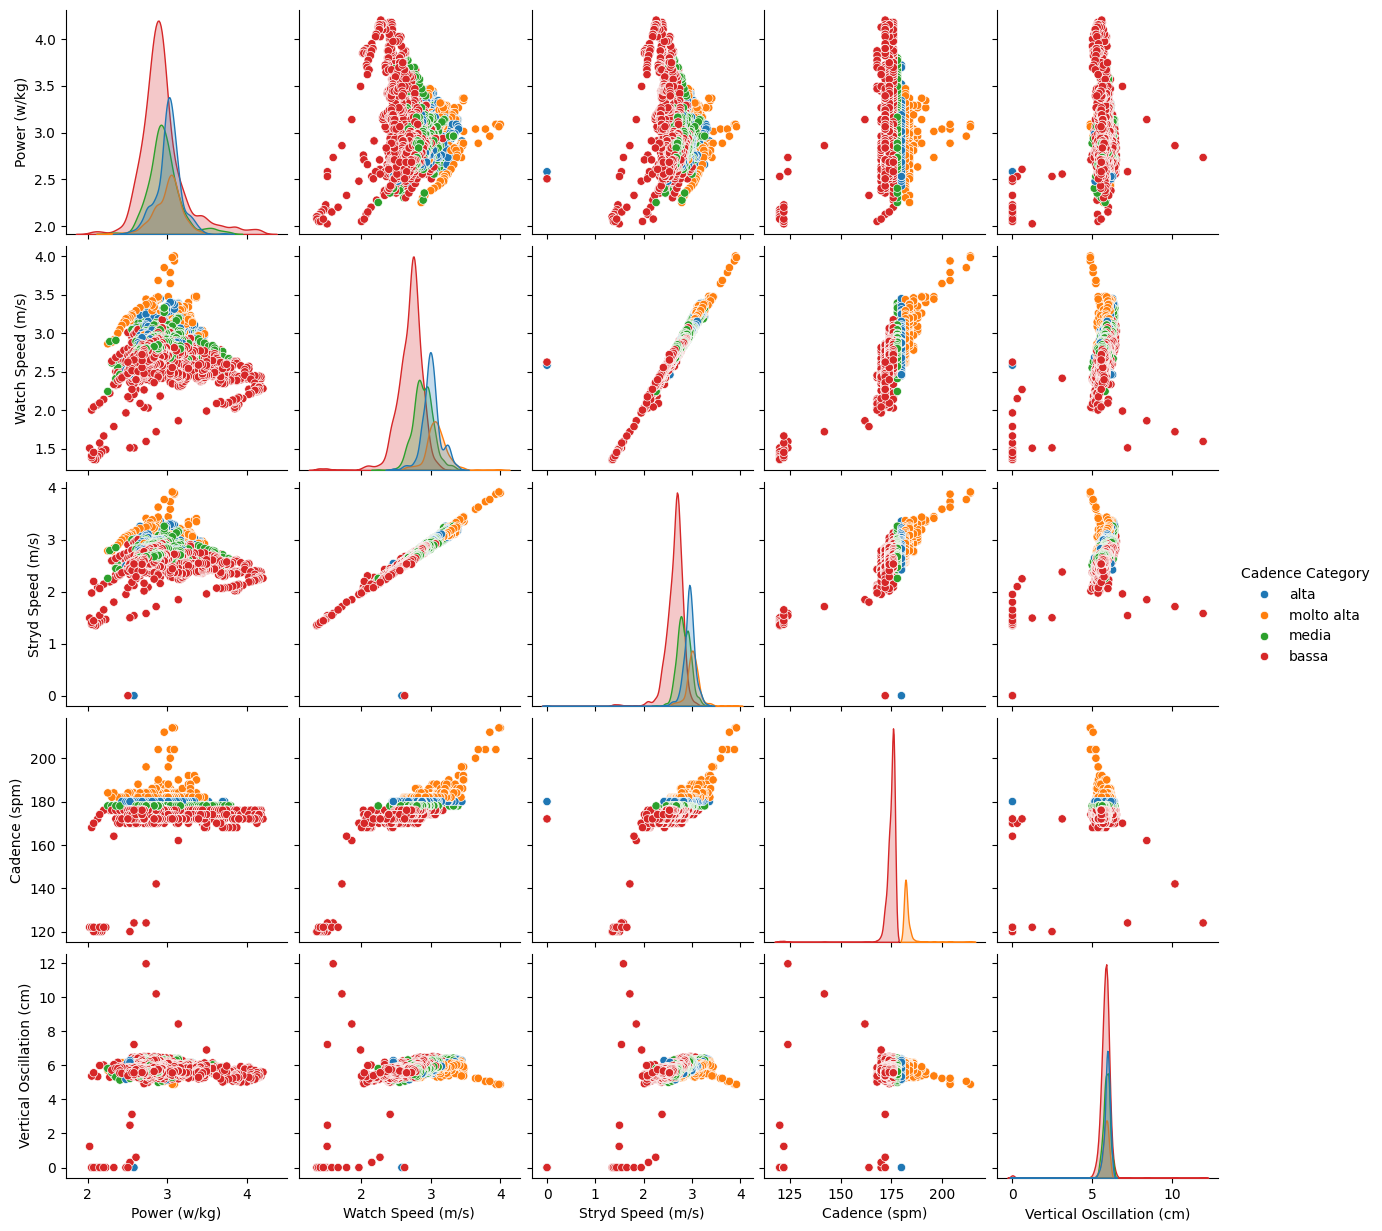

In [15]:
# Ricalcolo del pairplot utilizzando 'Cadence Category' come hue
sns.pairplot(df_significative.join(data['Cadence Category']), hue='Cadence Category')
plt.show()


# Data cleaning
Procedere con la fase di data cleaning e preparation è un passo cruciale prima di qualsiasi analisi approfondita o modellazione dei dati. Questo processo include la verifica e la correzione di anomalie nei dati, come valori mancanti, duplicati, o incoerenti. Vediamo quali passi possiamo seguire per preparare al meglio il tuo dataset:

- Gestione dei valori mancanti: Verificheremo se ci sono valori mancanti nel dataset e decideremo come gestirli (eliminazione, imputazione, ecc.).

- Rimozione dei duplicati: Controlliamo se ci sono righe duplicate e le rimuoviamo per evitare distorsioni nell'analisi.

- Verifica della coerenza dei dati: Assicuriamoci che i dati siano coerenti e realistici, controllando ad esempio che non ci siano velocità o potenze negative.

- Conversione dei tipi di dati: Se necessario, convertiremo i tipi di dati per assicurarci che siano appropriati per le analisi (ad esempio, convertire stringhe in datetime, se non già fatto).

- Normalizzazione o standardizzazione: Se prevediamo di utilizzare tecniche di modellazione che beneficiano della normalizzazione o della standardizzazione dei dati, potremmo considerare di applicare queste trasformazioni.

- Feature engineering: Possiamo anche creare nuove variabili che potrebbero essere utili per l'analisi o la modellazione, basandoci su quelle esistenti.

In [17]:
# Verifica dei valori mancanti
valori_mancanti = data.isnull().sum()

# Verifica dei duplicati
duplicati = data.duplicated().sum()

valori_mancanti, duplicati

(Timestamp                    0
 Power (w/kg)                 0
 Form Power (w/kg)            0
 Air Power (w/kg)             0
 Watch Speed (m/s)            0
 Stryd Speed (m/s)            0
 Watch Distance (meters)      0
 Stryd Distance (meters)      0
 Stiffness                    0
 Stiffness/kg                 0
 Ground Time (ms)             0
 Cadence (spm)                0
 Vertical Oscillation (cm)    0
 Watch Elevation (m)          0
 Stryd Elevation (m)          0
 Timestamp_dt                 0
 Cadence Category             0
 dtype: int64,
 0)

La verifica della coerenza dei dati implica controllare che tutte le variabili nel dataset abbiano valori plausibili e corretti in base alla loro natura e al contesto dell'allenamento dell'atleta. Ecco alcuni controlli specifici che possiamo effettuare:

- Velocità e Potenza: Assicurarsi che non ci siano valori negativi, poiché non sarebbero plausibili in questo contesto.

- Distanza: Verificare che i valori della distanza siano crescenti o almeno non decrescenti nel tempo, dato che l'atleta è in movimento.

- Cadenza: Controllare che i valori della cadenza siano entro un intervallo plausibile per la corsa umana.

- Tempo di Contatto con il Suolo e Oscillazione Verticale: Anche per queste metriche, verificare che i valori siano in un range realistico per l'attività di corsa.

Iniziamo con questi controlli per assicurarci che i dati riflettano accuratamente le prestazioni e le condizioni dell'allenamento.



In [18]:
# Verifica della coerenza dei dati per velocità, potenza, cadenza, tempo di contatto con il suolo, e oscillazione verticale
coerenza_dati = {
    "Velocità Watch Min": data["Watch Speed (m/s)"].min(),
    "Velocità Stryd Min": data["Stryd Speed (m/s)"].min(),
    "Potenza Min": data["Power (w/kg)"].min(),
    "Cadenza Min": data["Cadence (spm)"].min(),
    "Cadenza Max": data["Cadence (spm)"].max(),
    "Tempo di Contatto Min": data["Ground Time (ms)"].min(),
    "Tempo di Contatto Max": data["Ground Time (ms)"].max(),
    "Oscillazione Verticale Min": data["Vertical Oscillation (cm)"].min(),
    "Oscillazione Verticale Max": data["Vertical Oscillation (cm)"].max(),
}

coerenza_dati

{'Velocità Watch Min': 1.359,
 'Velocità Stryd Min': 0.0,
 'Potenza Min': 2.0253164556962027,
 'Cadenza Min': 120,
 'Cadenza Max': 214,
 'Tempo di Contatto Min': 0,
 'Tempo di Contatto Max': 1010,
 'Oscillazione Verticale Min': 0.0,
 'Oscillazione Verticale Max': 11.9556}

Dalla verifica della coerenza dei dati emergono alcuni punti da considerare:

- Velocità Watch Minima: 1.359 m/s, un valore plausibile per una corsa molto lenta o una camminata veloce.
- Velocità Stryd Minima: 0.0 m/s, che potrebbe indicare momenti di arresto completo durante la corsa. Potrebbe essere necessario esaminare il contesto di questi valori.
- Potenza Minima: 2.03 w/kg, un valore basso ma plausibile per una corsa leggera o un riscaldamento.
- Cadenza: varia da 120 a 214 spm, che sono entrambi valori plausibili per la corsa, sebbene 214 spm sia piuttosto elevato e potrebbe riflettere momenti di sprint o dati errati.
- Tempo di Contatto Minimo e Massimo: Il valore minimo è 0 ms, che non è plausibile per una corsa (indicando un assenza di contatto con il suolo), e il valore massimo è 1010 ms, che è insolitamente alto per la corsa e potrebbe indicare un errore o un momento di arresto.
- Oscillazione Verticale Minima e Massima: Da 0.0 cm a 11.96 cm, con il valore minimo di 0.0 cm che non sembra realistico durante la corsa, poiché implicherebbe assenza di oscillazione verticale.

# Data preparation
La standardizzazione è un passaggio importante per assicurare che le variabili contribuiscano in modo equo all'analisi di clustering, specialmente quando si utilizzano metodi basati sulla distanza, come il K-means.

Per la standardizzazione, utilizzeremo lo StandardScaler di scikit-learn, che sottrae la media e divide per la deviazione standard, portando ogni variabile a una media di zero e una deviazione standard di uno.

Dopo la standardizzazione, applicheremo un algoritmo di clustering ai dati per identificare possibili raggruppamenti nella tipologia di corsa dell'atleta, utilizzando le variabili numeriche originali inclusa la cadenza non categorizzata.

In [20]:
from sklearn.preprocessing import StandardScaler

# Selezione delle variabili numeriche per la standardizzazione e il clustering
variabili_per_clustering = ['Power (w/kg)', 'Form Power (w/kg)', 'Air Power (w/kg)', 
                            'Watch Speed (m/s)', 'Stryd Speed (m/s)', 'Cadence (spm)', 
                            'Vertical Oscillation (cm)', 'Ground Time (ms)']

# Estrazione del sottoinsieme di dati per il clustering
data_clustering = data[variabili_per_clustering]

# Standardizzazione dei dati
scaler = StandardScaler()
data_standardizzata = scaler.fit_transform(data_clustering)


# Analisi di Clustering

Dopo aver standardizzato i dati, il passo successivo sarebbe l'applicazione di un algoritmo di clustering, come il K-means, per identificare i raggruppamenti

In [22]:
from sklearn.cluster import KMeans

# Per la determinazione del numero ottimale di cluster dovremmo andare ad utilizzare
# uno dei meotodi presenti in letteratura (esempio: metodo del gomito).
# Per semplicità imposteremo il parametro di 'default'
n_clusters = 3

# Applicazione del K-means ai dati standardizzati
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_standardizzata)

# Aggiunta dei cluster ai dati per analisi successive
data['Cluster'] = clusters


# Valutazione
Dopo aver calcolato il numero di cluster è necessario andare a valutare la bontà del risultato ottenuto.
Per fare ciò possiamo:
- Esaminare le Statistiche Descrittive dei Cluster: Calcola le statistiche descrittive (media, mediana, deviazione standard, ecc.) per ciascuna variabile all'interno di ogni cluster. Questo può aiutarti a capire le caratteristiche distintive di ciascun gruppo.

- Visualizzare i Cluster: Utilizza visualizzazioni come scatter plot o pairplot con i cluster come hue per vedere come i cluster si distribuiscono nello spazio delle variabili. Questo è particolarmente utile per identificare pattern visivi e differenze tra i gruppi.

- Confrontare i Cluster rispetto a Metriche Specifiche: Se ci sono metriche chiave che ritieni particolarmente importanti, come la velocità media o la potenza media, puoi confrontare questi valori tra i cluster per identificare gruppi con prestazioni simili o diverse.

- Analisi della Dimensione Temporale: Se il tuo dataset include informazioni temporali, potresti esaminare come i membri di ciascun cluster si distribuiscono nel tempo o durante l'allenamento.

In [23]:
# Calcolo delle statistiche descrittive per ciascun cluster
for i in range(n_clusters):
    print(f"Statistiche descrittive per il cluster {i}:")
    display(data[data['Cluster'] == i][variabili_per_clustering].describe())
    print("\n")


Statistiche descrittive per il cluster 0:


,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Cadence (spm),Vertical Oscillation (cm),Ground Time (ms)
count,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000
mean,2.977055,0.903204,0.012837,3.011616,2.948524,179.478845,5.964402,261.885158
std,0.165885,0.013851,0.018203,0.130726,0.118399,2.699554,0.177366,7.681533
min,2.253165,0.822785,0.000000,2.707000,2.697270,172.000000,4.881650,202.000000
25%,2.860759,0.898734,0.000000,2.925250,2.867190,178.000000,5.866765,257.000000
50%,2.987342,0.898734,0.006329,2.992000,2.939450,180.000000,5.969860,262.000000
75%,3.063291,0.911392,0.025316,3.074000,3.011720,180.000000,6.073173,267.000000
max,3.594937,0.949367,0.164557,3.999000,3.921880,214.000000,6.509050,281.000000




Statistiche descrittive per il cluster 1:


,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Cadence (spm),Vertical Oscillation (cm),Ground Time (ms)
count,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.250753,0.405967,0.0,1.680095,1.419645,135.428571,0.220277,776.428571
std,0.200609,0.187670,0.0,0.399976,0.534474,23.427700,0.597262,306.118208
min,2.025316,0.000000,0.0,1.359000,0.000000,120.000000,0.000000,0.000000
25%,2.101266,0.379747,0.0,1.411000,1.375000,120.000000,0.000000,654.000000
50%,2.177215,0.392405,0.0,1.501000,1.449220,122.000000,0.000000,905.000000
75%,2.481013,0.436709,0.0,1.789000,1.546880,164.000000,0.000000,996.000000
max,2.607595,0.936709,0.0,2.624000,2.250000,180.000000,2.482040,1010.000000




Statistiche descrittive per il cluster 2:


,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Watch Speed (m/s),Stryd Speed (m/s),Cadence (spm),Vertical Oscillation (cm),Ground Time (ms)
count,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000
mean,2.958504,0.870941,0.043342,2.685216,2.631003,175.556923,5.766452,283.102154
std,0.287063,0.022322,0.039016,0.146768,0.136556,2.498505,0.252532,10.704372
min,2.050633,0.493671,0.000000,1.513000,1.541020,124.000000,3.119820,261.000000
25%,2.784810,0.860759,0.012658,2.611000,2.562500,174.000000,5.638135,276.000000
50%,2.911392,0.873418,0.037975,2.719000,2.664060,176.000000,5.783160,280.000000
75%,3.037975,0.886076,0.063291,2.783000,2.722660,176.000000,5.901850,288.000000
max,4.202532,0.917722,0.202532,3.006000,2.890630,182.000000,11.955600,508.000000


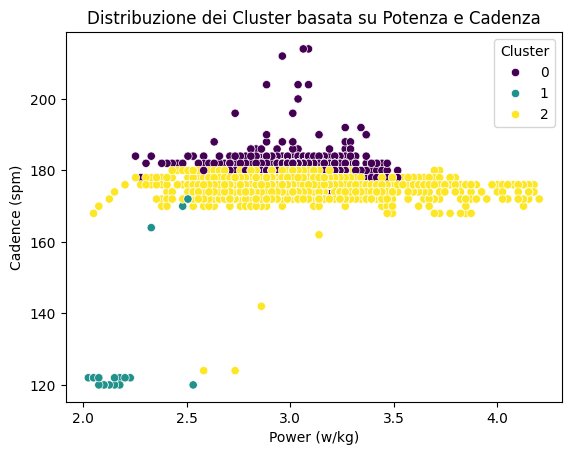

In [24]:
sns.scatterplot(data=data, x='Power (w/kg)', y='Cadence (spm)', hue='Cluster', palette='viridis')
plt.title('Distribuzione dei Cluster basata su Potenza e Cadenza')
plt.show()


### Q&A
- Confrontiamo lo scatter plot ottenuto con il raggruppamento delle istanze in cluster con quello del raggruppamento delle istanze sulla base dei quartili della cadenza. Quali differenze ci sono?

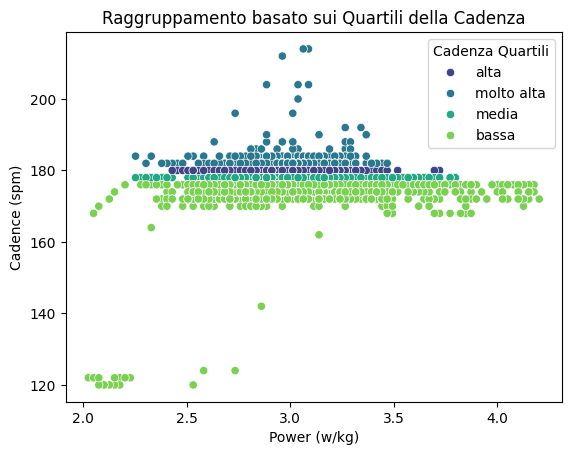

In [25]:
sns.scatterplot(data=data, x='Power (w/kg)', y='Cadence (spm)', hue='Cadence Category', palette='viridis')
plt.title('Raggruppamento basato sui Quartili della Cadenza')
plt.legend(title='Cadenza Quartili')
plt.show()